This notebook is dedicated to EDA of the titanic dataset, to understand the relation between the different features with the target and to use Feature Engineering to handle irregularities in data, and finally I've used a number of classification algorithms to find out the best accuracy.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

import graphviz 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Dataset

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


> **Get information about the data like count, mean, standard deviation etc.**

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> **Creating an array using the columns which would be used for the various graphs for EDA**

In [5]:
features = []
for i in train_data.columns:
    if i !='Survived':
        features.append(i)

features

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

> **Getting the information of the number of records per columns with null/NaN value**

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> **Checking the impact of each feature on target variable**

In [7]:
for i in features:
    print("\n\n"+i)
    print (train_data[[i, "Survived"]].groupby([i], as_index=False).mean())



PassengerId
     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         0
889          890         1
890          891         0

[891 rows x 2 columns]


Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Name
                                      Name  Survived
0                      Abbing, Mr. Anthony         0
1              Abbott, Mr. Rossmore Edward         0
2         Abbott, Mrs. Stanton (Rosa Hunt)         1
3                      Abelson, Mr. Samuel         0
4    Abelson, Mrs. Samuel (Hannah Wizosky)         1
..                                     ...       ...
886                de Mulder, Mr. Theodore         1
887              de Pelsmaeker, Mr. Alfons         0
888              del Carlo, Mr. Sebastiano         0
889        v

# FEATURE ENGINEERING
We see from the above table that some columns have a large amount of similar data or contain NaN values which would be difficult to be used in a model if no changes are made to them. For example, 

**PassengerID**: The ID has no impact on survival, so we might ignore the column altogether.

**Cabin**: The Cabin can be grouped according to the classes, and we can try to derive a pattern from it.

**Fare**: There are 200+ different fares that the passengers have paid. Instead of analysing them individually for a prediction, we can use them as a range.

**Ticket**: The Ticket has no impact on survival, so we might ignore the column altogether.

**Age**: Again, like Fare, we need to treat them as age group instead of considering individual ages 

**Name**: The names are not important, but the salutation is. We can use that in addition to the Sex and Age feature for prediction.

In [8]:
train_data.drop(['PassengerId','Ticket'],axis=1,inplace=True)

**NAME**

Let's look at Name feature. My idea is to get the salutation from each name and store it as a new column 'Title' in the dataframe.

In [9]:

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""


train_data['Title'] = train_data['Name'].apply(get_title)
train_data.drop('Name',axis=1,inplace=True)
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Let's check the number of records for each of these titles.

In [10]:
train_data.groupby(['Title']).size()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
dtype: int64

We can replace some of the titles (such as Ms -> Miss) and the group the ones which appear lesser compared to others in a new group. We'll then check the mean number of records of each title's relation to the output.

In [11]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')


In [12]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


**CABIN**

Next, I'm starting with the Cabin feature. For this, I'll assign -1 to NaN/null vales (and deal with them later) and group the others using the first letter of the values and create a new column 'Cabin_Group'.

In [13]:
def cabin_group(cabin):
    if type(cabin) == str:
        return cabin[0]
    else:
        return '-1'
train_data['Cabin_Group'] = train_data['Cabin'].apply(cabin_group)
train_data.drop('Cabin',axis=1,inplace=True)

Checking the relation between this new feature with target.

In [14]:
train_data[['Cabin_Group', 'Survived']].groupby(['Cabin_Group'], as_index=False).mean()

,Cabin_Group,Survived
0,-1,0.299854
1,A,0.466667
2,B,0.744681
3,C,0.593220
4,D,0.757576
5,E,0.750000
6,F,0.615385
7,G,0.500000
8,T,0.000000


**FARE**

I'm dividing the fare to 5 buckets or ranges, which I'd be using later for my model.

In [15]:
bucket = pd.qcut(train_data['Fare'], 5)
bucket.unique()

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [16]:
def FareGroup(fare):
    if float(fare):
        if fare > 0.0 and fare <= 7.854:
            return 1
        elif fare > 7.854 and fare <= 10.5:
            return 2
        elif fare > 10.5 and fare <= 21.679:
            return 3
        elif fare > 21.679 and fare <= 39.688:
            return 4
        elif fare > 39.688 and fare <= 512.329:
            return 5
        else:
            return -1
    else:
        return -1
    
    
train_data['FareRange'] = train_data['Fare'].apply(FareGroup)
train_data.drop('Fare',axis=1,inplace=True)
print(train_data.groupby(['FareRange']).size())

FareRange
-1     18
 1    151
 2    197
 3    171
 4    181
 5    173
dtype: int64


In [17]:
print (train_data[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean())

   FareRange  Survived
0         -1  0.222222
1          1  0.231788
2          2  0.203046
3          3  0.426901
4          4  0.441989
5          5  0.635838


**Age**

Creating a similar range for age as well, like Fare and assigning -1 to Null values to be handled later.

In [18]:
bucket = pd.qcut(train_data['Age'], 5).unique()
bucket

[(19.0, 25.0], (31.8, 41.0], (25.0, 31.8], NaN, (41.0, 80.0], (0.419, 19.0]]
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [19]:
def AgeGroup(age):
    if float(age):
        if age > 19.0 and age <= 25.0:
            return 1
        elif age > 25.0 and age <= 31.8:
            return 2
        elif age > 31.8 and age <= 41.0:
            return 3
        elif age > 41.0 and age <= 80.0:
            return 4
        elif age < 19.0:
            return 0
        else:
            return -1
    else:
        return -1
    
    
train_data['AgeGroup'] = train_data['Age'].apply(AgeGroup)
train_data.drop('Age',axis=1,inplace=True)
print (train_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean())

   AgeGroup  Survived
0        -1  0.301980
1         0  0.503597
2         1  0.328467
3         2  0.393701
4         3  0.437500
5         4  0.373239


I'll update my features array with these new features and dropping the old ones.

In [20]:
features = []
for i in train_data.columns:
    if i !='Survived':
        features.append(i)

features

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Title',
 'Cabin_Group',
 'FareRange',
 'AgeGroup']

 **HeatMap**

[Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) contains values having similar shades for same color for each value to be plotted. Darker values denote dense population than lighter colors.

<AxesSubplot:>

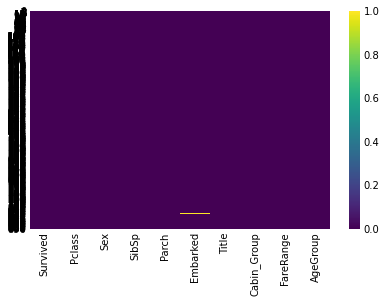

In [21]:
sns.heatmap(train_data.isnull(),yticklabels=True,cbar=True,cmap='viridis')

Let's have an array containing all the column names. We'll use them to create the different plots to check the count of values in each feature.

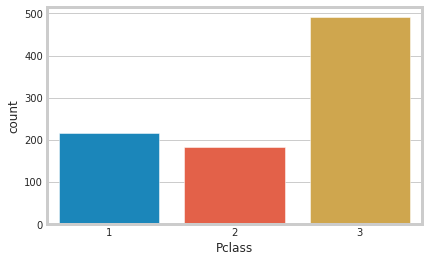

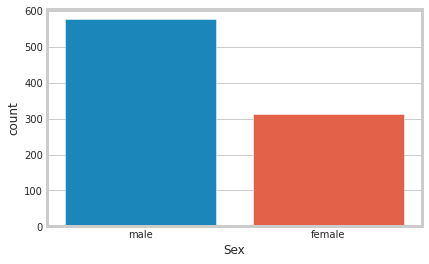

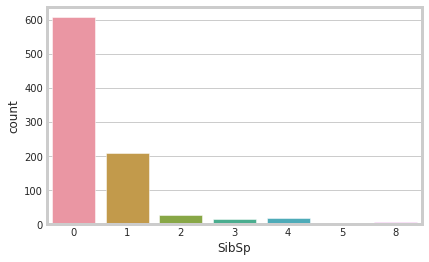

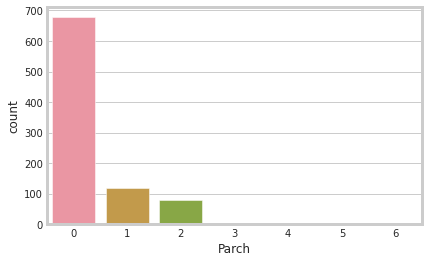

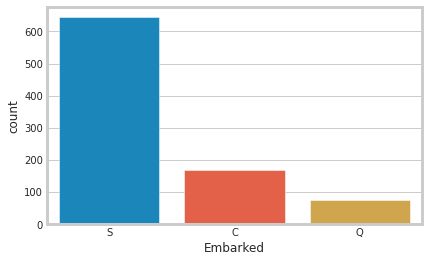

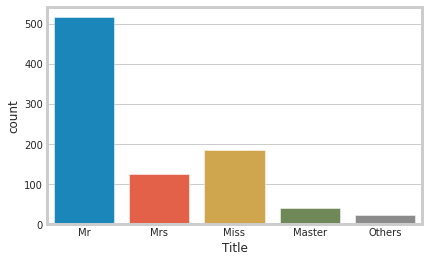

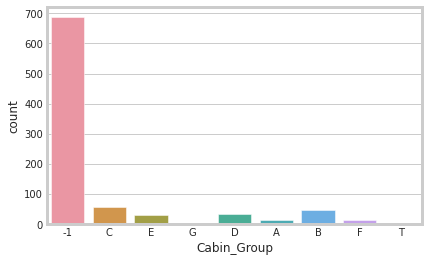

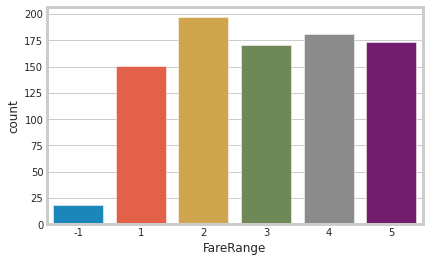

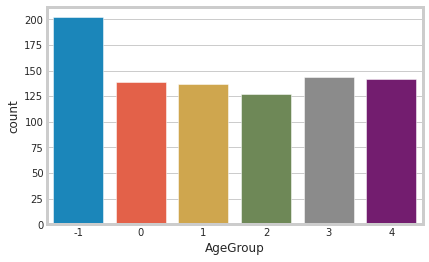

In [22]:
sns.set_style('whitegrid')
for i in features:
    sns.countplot(x=i,data=train_data)
    plt.show()

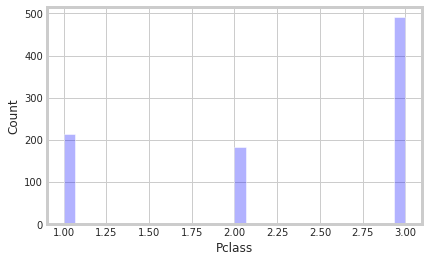

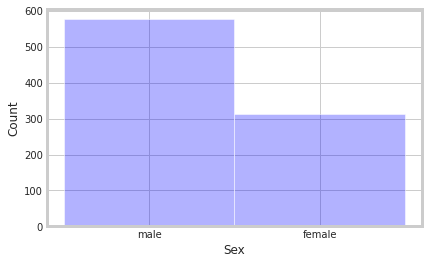

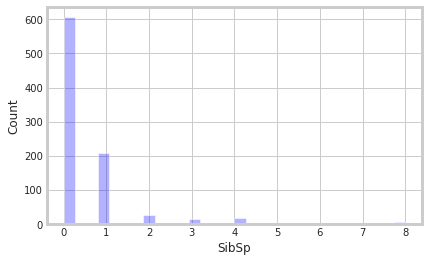

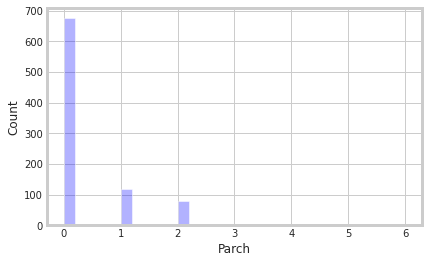

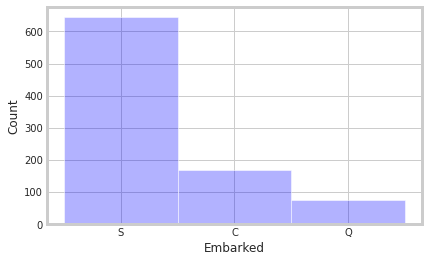

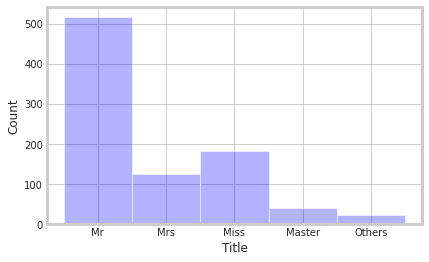

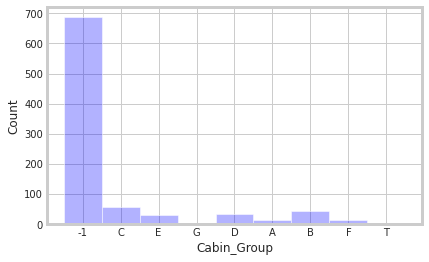

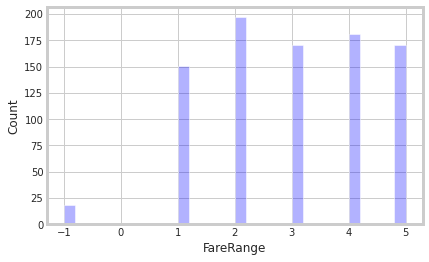

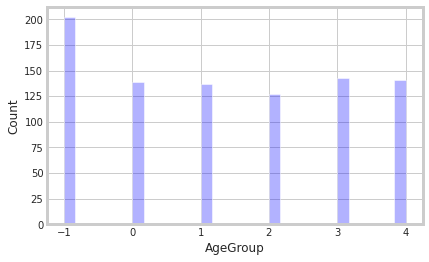

In [23]:
for i in features:
    sns.histplot(data=train_data.dropna(),x=i,bins=30,color='blue',alpha=0.3)
    plt.show()
    


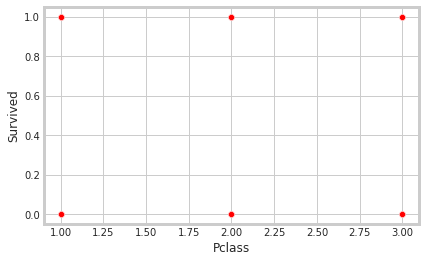

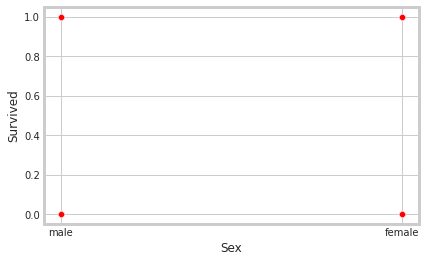

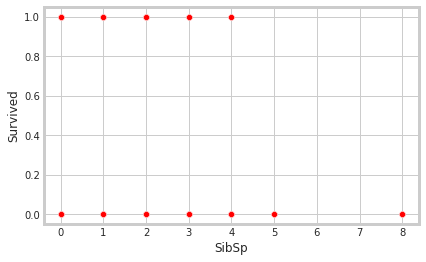

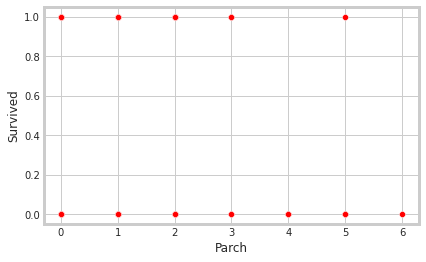

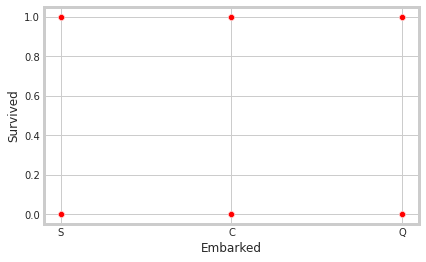

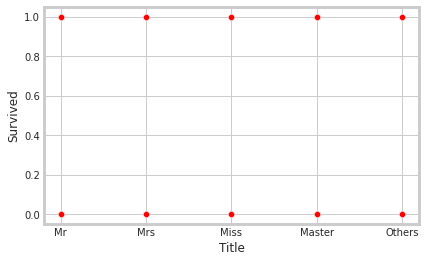

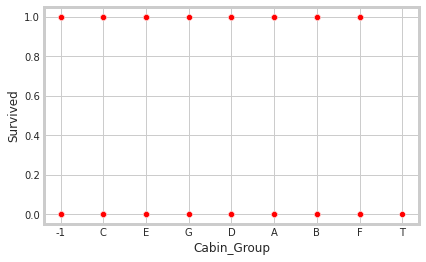

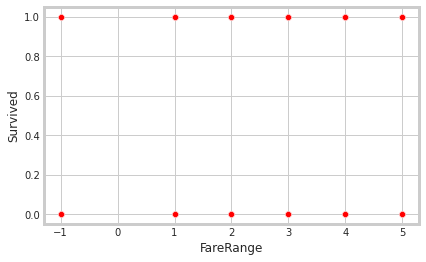

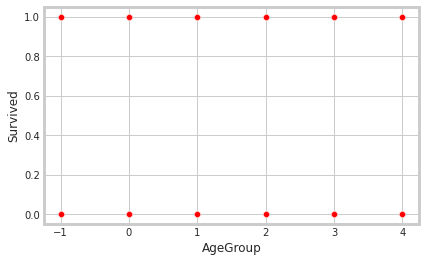

In [24]:
for i in features:
    if i != 'Survived':
        sns.scatterplot(data=train_data.dropna(),x=i,y='Survived',color='red')
        plt.show()


I will plot a countplot using x as my feature from the list against 'Survived' feature, as to check to which extent the target feature is influenced by individual features.

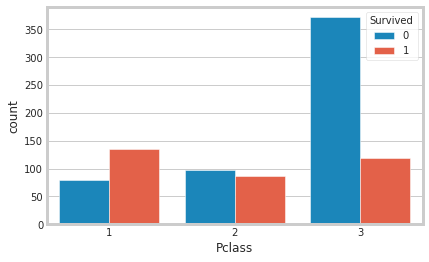

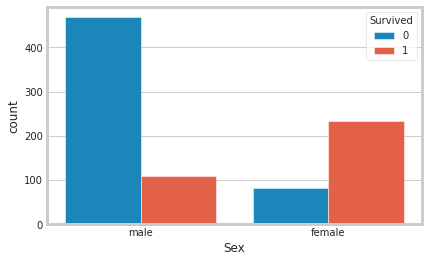

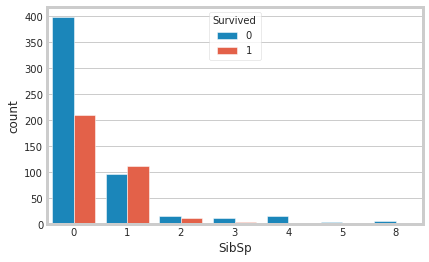

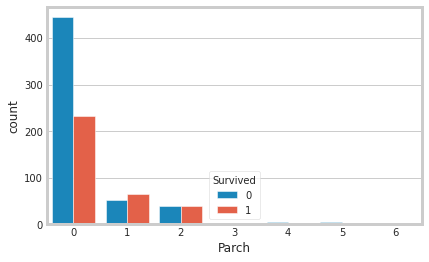

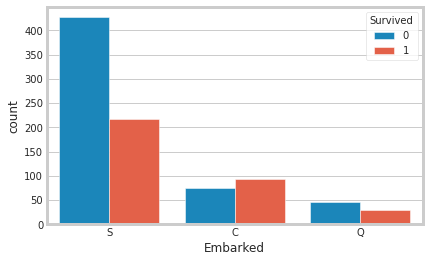

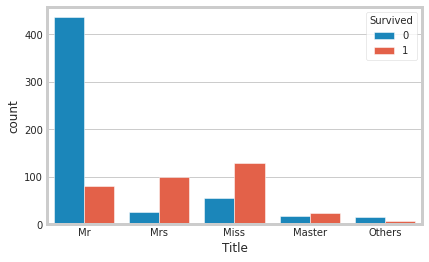

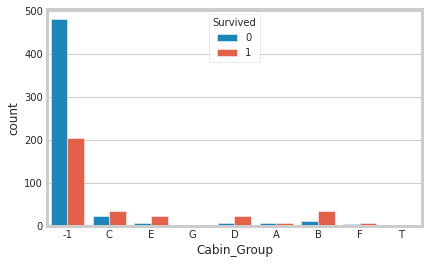

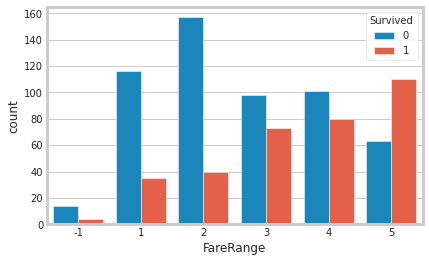

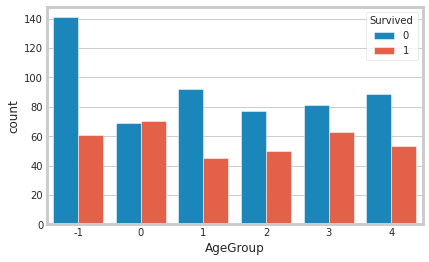

In [25]:
for i in features:    
    sns.countplot(i,hue='Survived',data=train_data)    
    plt.show()

FactorPlot wrt sex on Survived

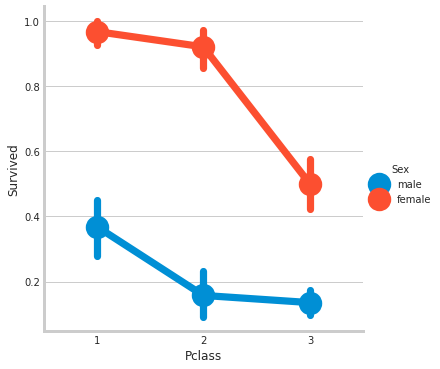

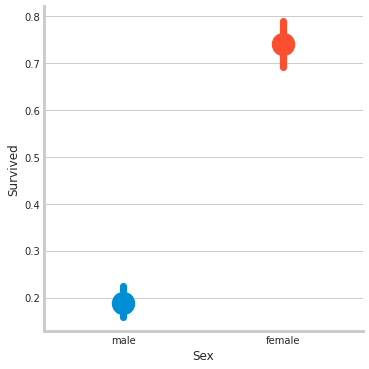

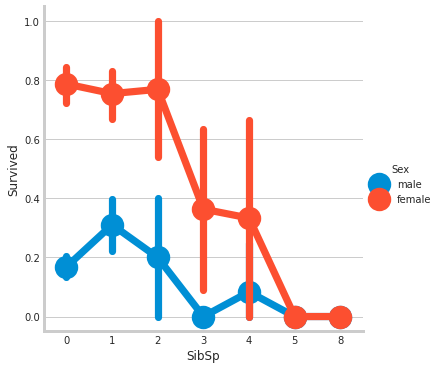

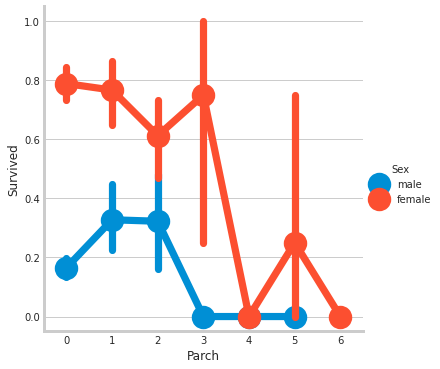

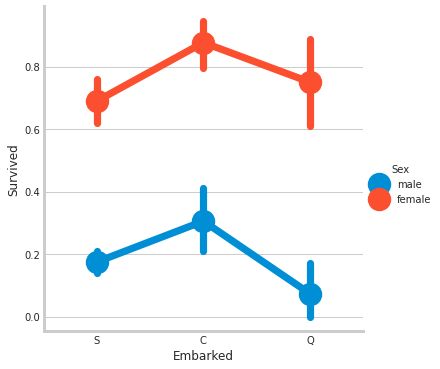

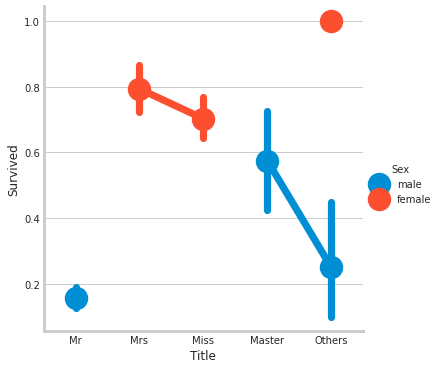

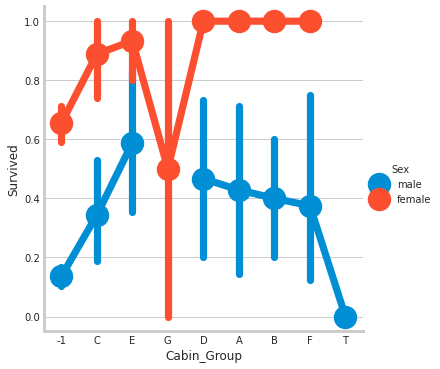

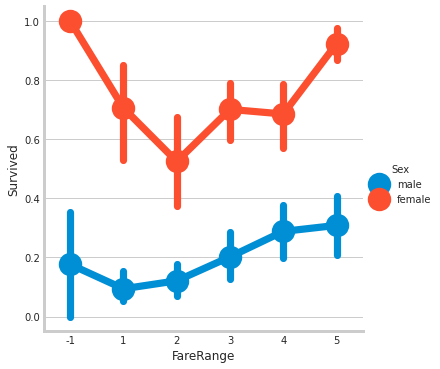

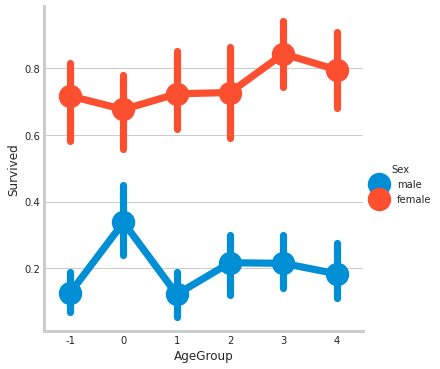

In [26]:
for i in features:
    sns.factorplot(i,'Survived',hue="Sex",data=train_data)
    plt.show()

ViolinPlot wrt sex on Survived

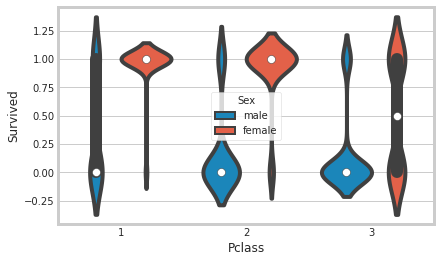

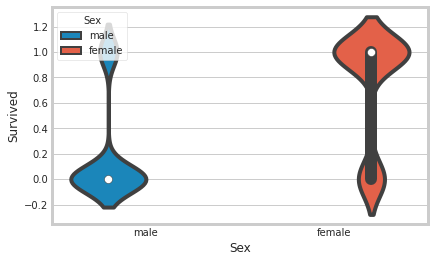

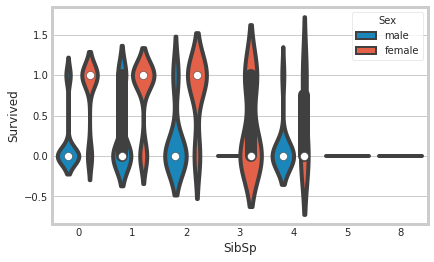

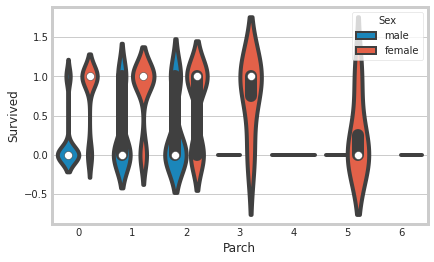

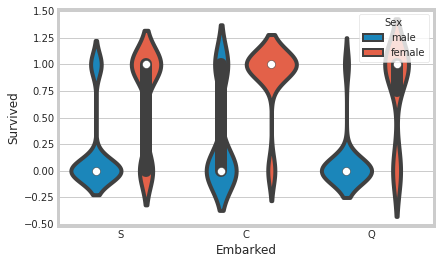

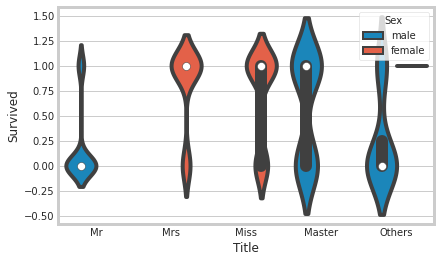

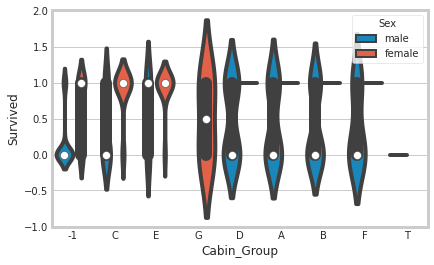

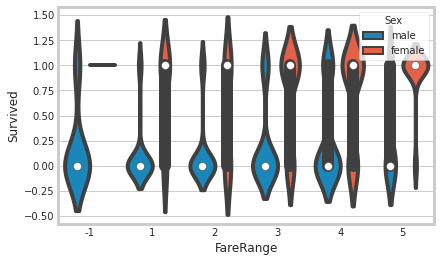

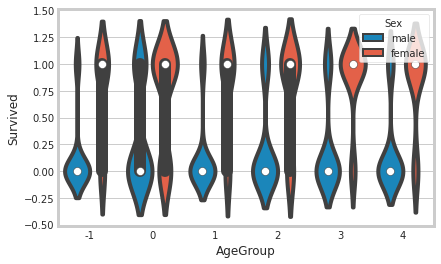

In [27]:
for i in features:
    sns.violinplot(i,'Survived',hue="Sex",data=train_data)
    plt.show()

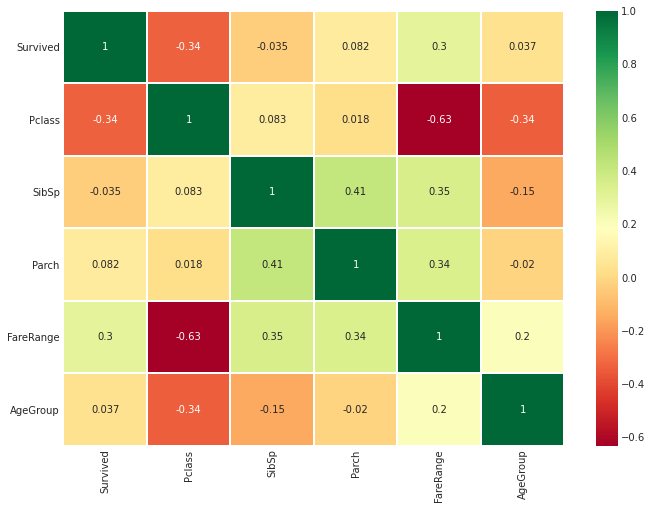

In [28]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Handling Null Values

We have null values in Age, Cabin and Embarked features. I'll try different methods o handling null values for these features.

**Embarked**

Since we have only 2 null records for Embarked feature, I'm going to save some time and just drop them.

In [29]:
train_data.dropna(subset=['Embarked'],inplace=True)
train_data.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

**Age and Fare**

Here, I'd be using KNN to predict te missing values (which I've classified as -1 in previous function). For this task, I'd be using KNNImputer.

In [30]:
train_data['AgeGroup'] = train_data['AgeGroup'].apply(lambda x: np.nan if x == -1 else x)
train_data['FareRange'] = train_data['FareRange'].apply(lambda x: np.nan if x == -1 else x)


imputer = KNNImputer(n_neighbors= 5)
AgeGroupImputed = imputer.fit_transform([train_data['AgeGroup']])
FareRangeImputed = imputer.fit_transform([train_data['FareRange']])
FareRangeImputed = pd.Series(FareRangeImputed[0])
AgeGroupImputed = pd.Series(AgeGroupImputed[0])
train_data['FareRange'] = FareRangeImputed
train_data['AgeGroup'] = AgeGroupImputed

train_data.head(20)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Cabin_Group,FareRange,AgeGroup
0,0,3,male,1,0,S,Mr,-1,1.0,1.0
1,1,1,female,1,0,C,Mrs,C,5.0,3.0
2,1,3,female,0,0,S,Miss,-1,2.0,2.0
3,1,1,female,1,0,S,Mrs,C,5.0,3.0
4,0,3,male,0,0,S,Mr,-1,2.0,3.0
5,0,3,male,0,0,Q,Mr,-1,2.0,4.0
6,0,1,male,0,0,S,Mr,E,5.0,0.0
7,0,3,male,3,1,S,Master,-1,3.0,2.0
8,1,3,female,0,2,S,Mrs,-1,3.0,0.0
9,1,2,female,1,0,C,Mrs,-1,4.0,0.0


I'll replace the new columns with the one hot encoded values and append them to my dataframe.

In [31]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
title = pd.get_dummies(train_data['Title'],drop_first=True)
fare = pd.get_dummies(train_data['FareRange'],drop_first=True)
cabin = pd.get_dummies(train_data['Cabin_Group'],drop_first=True)
age = pd.get_dummies(train_data['AgeGroup'],drop_first=True)

train_data.drop(['AgeGroup','Sex',"Embarked",'Title','Cabin_Group','FareRange'],axis=1,inplace=True)

train_data = pd.concat([train_data,sex,embark,title,cabin,fare,age],axis=1)
train_data.head(20)

,Survived,Pclass,SibSp,Parch,male,Q,S,Miss,Mr,Mrs,...,G,T,2.0,3.0,4.0,5.0,1.0,2.0,3.0,4.0
0,0,3,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,1,3,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,3,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5,0,3,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
6,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0,3,3,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,1,3,0,2,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,1,2,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [33]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train,y_train)

accuracy=accuracy_score(y_test,LogisticRegressionModel.predict(X_test))

classificationRep=classification_report(y_test,LogisticRegressionModel.predict(X_test))
print("Classification Report: \n"+classificationRep)
print("Accuracy: "+str(accuracy))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.85      0.75      0.80       104

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267

Accuracy: 0.850187265917603


In [34]:
DecisionTreeModel = tree.DecisionTreeClassifier()
DecisionTreeModel = DecisionTreeModel.fit(X_train, y_train)
accuracy=accuracy_score(y_test,DecisionTreeModel.predict(X_test))
classificationRep=classification_report(y_test,DecisionTreeModel.predict(X_test))
print("Classification Report: \n"+classificationRep)
print("Accuracy: "+str(accuracy))

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       163
           1       0.79      0.59      0.67       104

    accuracy                           0.78       267
   macro avg       0.78      0.74      0.75       267
weighted avg       0.78      0.78      0.77       267

Accuracy: 0.7790262172284644


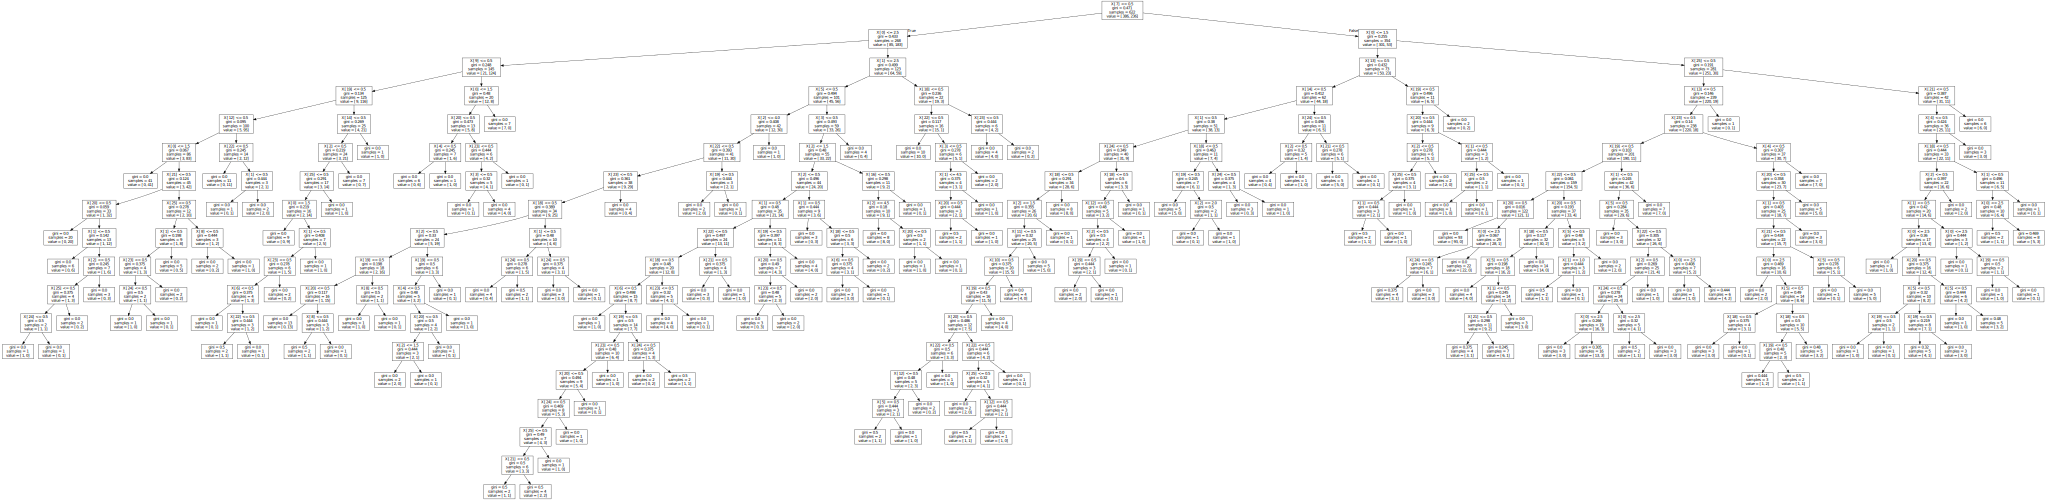

In [35]:
data = tree.export_graphviz(DecisionTreeModel, out_file=None) 
graph = graphviz.Source(data) 
graph.render("Titanic") 
graph

In [36]:
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors=5)
KNeighborsClassifierModel.fit(X_train, y_train)
accuracy=accuracy_score(y_test,KNeighborsClassifierModel.predict(X_test))
classificationRep=classification_report(y_test,KNeighborsClassifierModel.predict(X_test))
print("Classification Report: \n"+classificationRep)
print("Accuracy: "+str(accuracy))

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       163
           1       0.86      0.62      0.72       104

    accuracy                           0.81       267
   macro avg       0.83      0.78      0.79       267
weighted avg       0.82      0.81      0.81       267

Accuracy: 0.8127340823970037


In [37]:
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)
accuracy=accuracy_score(y_test,GaussianNBModel.predict(X_test))
classificationRep=classification_report(y_test,GaussianNBModel.predict(X_test))
print("Classification Report: \n"+classificationRep)
print("Accuracy: "+str(accuracy))

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       163
           1       0.68      0.87      0.76       104

    accuracy                           0.79       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.81      0.79      0.79       267

Accuracy: 0.7902621722846442


In [38]:
RandomForestClassifierModel = RandomForestClassifier(max_depth=5, random_state=0)
RandomForestClassifierModel.fit(X_train,y_train)
accuracy=accuracy_score(y_test,RandomForestClassifierModel.predict(X_test))
classificationRep=classification_report(y_test,RandomForestClassifierModel.predict(X_test))
print("Classification Report: \n"+classificationRep)
print("Accuracy: "+str(accuracy))

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.85      0.66      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.81       267
weighted avg       0.83      0.82      0.82       267

Accuracy: 0.8239700374531835


If you like it, please upvote. Also let me know in the comments, if my strategy is incorrect somewhere or you have a better solution for any part or any suggestions on how I should improve the accuracy of my models.